In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 11.1 Date and Time Data Types and Tools

In [16]:
# python standard library has built-in types for date and time data
# datetime is standard for time and date
from datetime import datetime

now = datetime.now()
now, now.year, now.month, now.day

(datetime.datetime(2025, 12, 15, 13, 39, 1, 833577), 2025, 12, 15)

In [17]:
# the library also supports calculating time deltas
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta, delta.days, delta.seconds

(datetime.timedelta(days=926, seconds=56700), 926, 56700)

In [18]:
# you can also add or subtract a timedelta to a datetime
from datetime import timedelta

start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

- python has built-in support for datetypes with the `datetime` standard library
- the `datetime` object stores the date and time down to the microsecond
- `timedelta` is used to represent the difference between two `datetime` objects
- you can add and subtract a timedelta to a datetime to a yield a new shifted object

## Converting Between String and DateTime

In [19]:
# can easily convert to strings
stamp = datetime(2011, 1, 3)
str(stamp), stamp.strftime("%Y-%m-%d")

('2011-01-03 00:00:00', '2011-01-03')

In [20]:
# or convert strings to datetime
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [21]:
# also with different formats!
datestrs = ["7/6/2011", "8/6/2011"]
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [22]:
# pandas supports directly parsing arrays with standard date formats, like ISO 8601
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [23]:
# missing values are supported as well
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [24]:
idx[2], pd.isna(idx)    # NaT, Not a Time

(NaT, array([False, False,  True]))

- you can convert datetime to string by using `str(time)`
- if a different format is desired, `.strftime("format")` can be used
- similarly, `datetime.strptime(value, "format")` ca be used to convert a string to a datetime
- pandas also supports conversion: `pd.to_datetime(dates)` will parse each string in `dates` and return a special `DatetimeIndex` object

# 11.2 Time Series Basics

In [14]:
# We can use dates as the index
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

2011-01-02    0.454328
2011-01-05   -0.444037
2011-01-07    0.170875
2011-01-08    0.245811
2011-01-10   -1.985890
2011-01-12   -1.016335
dtype: float64

In [25]:
# pandas automatically puts them into a DatetimeIndex
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [26]:
# arithmetic operations automatically align on the index
ts + ts[::2]

2011-01-02    0.908656
2011-01-05         NaN
2011-01-07    0.341750
2011-01-08         NaN
2011-01-10   -3.971780
2011-01-12         NaN
dtype: float64

In [28]:
# pandas uses numpy's datetime64 data type
ts.index.dtype

dtype('<M8[ns]')

In [30]:
# scalar values have a special pandas Timestamp object
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

- when passing in a datetime index to the constructor of a series or dataframe, the index will automatically be a `DatetimeIndex`
- any computations on `DatetimeIndex` indexed series will automatically align based on the datetime

## Indexing, Selection, Subsetting

In [31]:
# slicing and indexing works the same
stamp = ts.index[2]
ts[stamp]

np.float64(0.1708750835084071)

In [32]:
ts["2011-01-10"]

np.float64(-1.9858900144135507)

In [33]:
longer_ts = pd.Series(np.random.standard_normal(1000), index=pd.date_range("2000-01-01", periods=1000))
longer_ts

2000-01-01   -0.199845
2000-01-02    0.889042
2000-01-03   -0.531526
2000-01-04    0.165556
2000-01-05   -2.291068
                ...   
2002-09-22   -0.969879
2002-09-23    0.489390
2002-09-24    0.353989
2002-09-25    0.540901
2002-09-26    1.487184
Freq: D, Length: 1000, dtype: float64

In [34]:
# longer time-series also support yearly or monthly slicing
longer_ts["2001"]

2001-01-01    0.770736
2001-01-02    1.496909
2001-01-03   -0.710232
2001-01-04   -0.277138
2001-01-05    0.813610
                ...   
2001-12-27   -0.326753
2001-12-28   -0.603942
2001-12-29    0.633150
2001-12-30   -0.881743
2001-12-31   -0.912053
Freq: D, Length: 365, dtype: float64

In [35]:
longer_ts["2001-05"]

2001-05-01    0.432976
2001-05-02   -1.829683
2001-05-03    0.534978
2001-05-04    0.165273
2001-05-05    1.240810
2001-05-06   -0.130066
2001-05-07   -0.706123
2001-05-08   -1.020032
2001-05-09   -0.807289
2001-05-10    0.405443
2001-05-11    1.031875
2001-05-12   -0.540644
2001-05-13   -0.973999
2001-05-14   -0.845980
2001-05-15   -1.210668
2001-05-16    0.280311
2001-05-17    1.451866
2001-05-18    1.581698
2001-05-19   -2.204454
2001-05-20    0.122144
2001-05-21    0.726752
2001-05-22    1.102129
2001-05-23    0.243183
2001-05-24    0.545491
2001-05-25    0.931970
2001-05-26    0.839811
2001-05-27   -1.206525
2001-05-28    0.099476
2001-05-29    1.319955
2001-05-30   -0.199993
2001-05-31   -0.734314
Freq: D, dtype: float64

In [36]:
# also with datetime instead of string
ts[datetime(2011, 1, 7)]

np.float64(0.1708750835084071)

In [37]:
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

2011-01-07    0.170875
2011-01-08    0.245811
2011-01-10   -1.985890
dtype: float64

In [39]:
# you can also slice with timestamps not present in the data
ts["2011-01-06":"2011-01-11"]

2011-01-07    0.170875
2011-01-08    0.245811
2011-01-10   -1.985890
dtype: float64

In [40]:
# truncate is a similar function that slices a series between two dates
ts.truncate(after="2011-01-09")

2011-01-02    0.454328
2011-01-05   -0.444037
2011-01-07    0.170875
2011-01-08    0.245811
dtype: float64

In [41]:
# all of the above works with dataframes too
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
long_df = pd.DataFrame(np.random.standard_normal((100, 4)), index=dates, columns=["Colorado", "Texas", "New York", "Ohio"])
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,0.067395,0.533883,0.411131,-0.355037
2001-05-09,-1.038862,-0.381934,-0.118064,-0.188517
2001-05-16,-0.007911,-0.514885,-0.075399,0.712386
2001-05-23,0.165793,-1.061189,0.071472,0.049800
2001-05-30,-0.225444,-2.227657,1.987426,0.679656


- we can index datetime series or dataframes using the date directly
- several formats are supported: a `datetime` object, a string...
- even yearly and monthly indexing is supported, which returns a whole slice only by passing the year/month (e.g. df["2001"]
- slicing dates is supported as well, even dates not in the index can be sliced
- the `truncate()` function is a convenience function that supports slicing based on two dates
- all of the above is true for dataframes as well!

## Time Series with Duplicate Indices

In [43]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02", "2000-01-02", "2000-01-03"])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [44]:
# check whether the index is unique (this has been mentioned before!)
dup_ts.index.is_unique

False

In [45]:
dup_ts["2000-01-03"]

np.int64(4)

In [47]:
# when indexing a duplicate index, a slice is returned
dup_ts["2000-01-02"]

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [48]:
# we can use this property to directly group by unique indices
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [49]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

- when indexing a duplicate date, a slice is returned
- this can be conveniently used to group data using `.groupby(level=0)`

# 11.3 Date Ranges, Frequencies and Shifting

By default, any time series data in pandas is assumed to have no fixed frequency. This is not always desirable, so pandas has multiple functions and methods to interpolate and introduce missing values.

In [52]:
# we can e.g. use resample to convert a dataframe to one with a fixed frequency
resampler = ts.resample("D") # "D" means daily
resampler

- we can create fixed frequency series by using `.resample()` and a frequency specifier

## Generating Date Ranges

In [53]:
# date range can be used to generate a DatetimeIndex based on some date ranges
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [54]:
# by default, daily timestamps are created
# we can also pass in only one date and the number of periods to generate
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [56]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [58]:
# other frequencies are supported as well, like BM:
pd.date_range("2000-01-01", "2000-12-01", freq="BME")

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

And many more, such as daily, business daily, hourly, once a minute ...

In [59]:
# the time is preserved as well
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [60]:
# this default behavior can be overwritten
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

- `pd.date_range(start, end)` is a convenient way of generating a `DatetimeIndex`
- by default, the returned index is daily, but other frequencies are supported too
- the function can also be called with `periods=<int>` and either `start` or `end`

## Frequencies and Date Offsets

In [64]:
# we can create a date range with a custom frequency using freq
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4h")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [65]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

In [66]:
# week of month is supported too
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

-  use `pd.date_range(start, end, freq="WOM")` to create a `DatetimeIndex` with a custom frequency

## Shifting (Leading and Lagging) Data

In [68]:
ts = pd.Series(np.random.standard_normal(4), index=pd.date_range("2000-01-01", periods=4, freq="ME"))
ts

2000-01-31   -0.180651
2000-02-29    0.454736
2000-03-31   -0.358596
2000-04-30    0.807899
Freq: ME, dtype: float64

In [69]:
# shifting means moving data backward and forward in time
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.180651
2000-04-30    0.454736
Freq: ME, dtype: float64

In [70]:
# note how the index remains unmodified
ts.shift(-2)

2000-01-31   -0.358596
2000-02-29    0.807899
2000-03-31         NaN
2000-04-30         NaN
Freq: ME, dtype: float64

In [71]:
# we can also advance the timestamps if we know the frequency
ts.shift(2, freq="ME")

2000-03-31   -0.180651
2000-04-30    0.454736
2000-05-31   -0.358596
2000-06-30    0.807899
Freq: ME, dtype: float64

In [72]:
# by other frequencies can be passed, too
ts.shift(3, freq="D")

2000-02-03   -0.180651
2000-03-03    0.454736
2000-04-03   -0.358596
2000-05-03    0.807899
dtype: float64

In [74]:
ts.shift(1, freq="90min")

2000-01-31 01:30:00   -0.180651
2000-02-29 01:30:00    0.454736
2000-03-31 01:30:00   -0.358596
2000-04-30 01:30:00    0.807899
dtype: float64

In [75]:
from pandas.tseries.offsets import Day, MonthEnd

# datetime can also be used with pandas objects
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [78]:
# using anchored offsets, the first increment will roll forward to the nect date according to the frequency rule
now + MonthEnd(), now + MonthEnd(2)

(Timestamp('2011-11-30 00:00:00'), Timestamp('2011-12-31 00:00:00'))

In [77]:
offset = MonthEnd()

offset.rollforward(now), offset.rollback(now)

(Timestamp('2011-11-30 00:00:00'), Timestamp('2011-10-31 00:00:00'))

In [79]:
ts = pd.Series(np.random.standard_normal(20), index=pd.date_range("2000-01-15", periods=20, freq="4D"))
ts

2000-01-15    0.201831
2000-01-19   -0.457354
2000-01-23    0.686141
2000-01-27    0.436469
2000-01-31   -1.363632
2000-02-04   -1.141460
2000-02-08    0.826851
2000-02-12   -0.362469
2000-02-16   -1.639213
2000-02-20    0.553286
2000-02-24    0.645936
2000-02-28    1.641082
2000-03-03    0.966257
2000-03-07   -1.033207
2000-03-11   -0.971371
2000-03-15   -0.080012
2000-03-19   -1.659302
2000-03-23   -0.439448
2000-03-27   -1.553376
2000-03-31   -1.078699
Freq: 4D, dtype: float64

In [80]:
# one possible way of using these methods is in combination with groupby
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31   -0.099309
2000-02-29    0.074859
2000-03-31   -0.731145
dtype: float64

In [82]:
# the same outcome can be achieved with resample (wtf does resample do??)
ts.resample("ME").mean()

2000-01-31   -0.099309
2000-02-29    0.074859
2000-03-31   -0.731145
Freq: ME, dtype: float64

- we can shift data by datetime using `.shift()`
- the method again supports a frequency: `series.shift(..., freq="ME")`
- we can use anchored offsets to group data
- e.g. using `ts.groupby(MonthEnd().rollforward).mean()` (groups dates by month)

# 11.4 Time Zone Handling

In [83]:
# pandas uses the pytz library for time zones
# but all of its functionality is hidden behind wrappers, so the API does not need to be looked through

## Time Zone Localization and Conversion

In [84]:
dates = pd.date_range("2012-03-09 09:30", periods=6)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-09 09:30:00   -0.603291
2012-03-10 09:30:00    0.569202
2012-03-11 09:30:00   -0.269998
2012-03-12 09:30:00   -1.394346
2012-03-13 09:30:00   -0.028703
2012-03-14 09:30:00    0.231632
Freq: D, dtype: float64

In [85]:
# by default, time series in pandas are time zone naive
ts.index.tz # empty output

In [86]:
# but date ranges can be generated using a time zone set
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [88]:
# existing time series data can be localized:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-09 09:30:00+00:00   -0.603291
2012-03-10 09:30:00+00:00    0.569202
2012-03-11 09:30:00+00:00   -0.269998
2012-03-12 09:30:00+00:00   -1.394346
2012-03-13 09:30:00+00:00   -0.028703
2012-03-14 09:30:00+00:00    0.231632
Freq: D, dtype: float64

In [89]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [90]:
# when converting now, the index is now updated:
ts_utc.tz_convert("America/New_York")

2012-03-09 04:30:00-05:00   -0.603291
2012-03-10 04:30:00-05:00    0.569202
2012-03-11 05:30:00-04:00   -0.269998
2012-03-12 05:30:00-04:00   -1.394346
2012-03-13 05:30:00-04:00   -0.028703
2012-03-14 05:30:00-04:00    0.231632
Freq: D, dtype: float64

- by default, `DatetimeIndex` will have no time zone
- a time zone can be added using `series.tz_localize(tz)` with the timezone localization as a parameter
- the time zone can then be converted using `series.tz_convert(tz)`
- DST transitions are taken into account

## Operations with Time Zone-Aware Timestamp Objects

In [93]:
# single timestamp objects can be localized and converted too
stamp = pd.Timestamp("2011-03-12 04:00")
stamp_utc = stamp.tz_localize("utc")
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [95]:
# the timezone can be declared directly in the constructor
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [96]:
# time-zone aware timestamp objects store the UTC timestamp in nanoseconds
stamp_utc.value

1299902400000000000

In [99]:
# pandas tries to respect daylight saving time transitions
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern")
stamp, stamp + Hour()

(Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern'),
 Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern'))

In [100]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")
stamp, stamp + 2 * Hour()

(Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern'),
 Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern'))

- also when adding an offset to some time zone-aware object, DST transitions will be taken into account

## Operations Between Different Time Zones

In [101]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2012-03-07 09:30:00    1.027131
2012-03-08 09:30:00    0.408242
2012-03-09 09:30:00   -2.033861
2012-03-12 09:30:00   -1.508642
2012-03-13 09:30:00   -0.532193
2012-03-14 09:30:00    0.002607
2012-03-15 09:30:00   -0.833975
2012-03-16 09:30:00   -0.537997
2012-03-19 09:30:00    1.160579
2012-03-20 09:30:00    0.198948
Freq: B, dtype: float64

In [103]:
# combining two series with different time zone will create a unified one using UTC
ts1 = ts[:7].tz_localize("Europe/London")
ts2 = ts[2:].tz_localize("Europe/Moscow")
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 05:30:00+00:00', '2012-03-09 09:30:00+00:00',
               '2012-03-12 05:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 05:30:00+00:00', '2012-03-13 09:30:00+00:00',
               '2012-03-14 05:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 05:30:00+00:00', '2012-03-15 09:30:00+00:00',
               '2012-03-16 05:30:00+00:00', '2012-03-19 05:30:00+00:00',
               '2012-03-20 05:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

- when combining two series with different time zones, a unified one with UTC will be created

# 11.5 Periods and Period Arithmetic

In [3]:
# a period represents a time span, like days, months, quarters or years
p = pd.Period("2011", freq="Y-DEC")
p

# in this case, the period represents the whole year 2011

Period('2011', 'Y-DEC')

In [5]:
# adding or subtracting integers shifts a period
p + 5, p - 2

(Period('2016', 'Y-DEC'), Period('2009', 'Y-DEC'))

In [7]:
# if two periods have the same frequency, their difference is the number of units between them as a date offset
pd.Period("2014", freq="Y-DEC") - p

<3 * YearEnds: month=12>

In [8]:
# regular ranges can be constructed using the period_range function
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [9]:
# period index stores a sequence of periods and can serve as an axis index
pd.Series(np.random.standard_normal(6), index=periods)

2000-01    0.685224
2000-02    0.760519
2000-03    0.076913
2000-04    0.129571
2000-05    0.523255
2000-06    0.530836
Freq: M, dtype: float64

In [10]:
# an array of strings can also be converted to a period index
values = ["2001Q3", "2002Q2", "2003Q1"]
index = pd.PeriodIndex(values, freq="Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

- A period represents a time span, like months, days or quarters
- `pd.Period` represents this data type
- e.g. `pd.Period("2011", freq="Y-DEC")` represents a year from January to December
- we can shift the period using addition and subtraction
- `pd.period_range()` can be used to create a period range by passing a start and end date, as well as a frequency
- the returned object is a `PeriodIndex`, which can be used as an axis index

## Period Frequency Conversion

In [11]:
p = pd.Period("2011", freq="Y-DEC")
p

Period('2011', 'Y-DEC')

In [13]:
# periods and period index can be converted to another frequency
p.asfreq("M", how="start"), p.asfreq("M", how="end"), p.asfreq("M")

(Period('2011-01', 'M'), Period('2011-12', 'M'), Period('2011-12', 'M'))

In [14]:
# for a fiscal year ending in a different month, the subperiods are different
p = pd.Period("2011", freq="Y-JUN")
p

Period('2011', 'Y-JUN')

In [15]:
p.asfreq("M", how="start"), p.asfreq("M", how="end")

(Period('2010-07', 'M'), Period('2011-06', 'M'))

In [18]:
# pandas automatically determines where some period belongs
p = pd.Period("Aug-2011", "M")
p.asfreq("Y-JUN")

Period('2012', 'Y-JUN')

In [19]:
periods = pd.period_range("2006", "2009", freq="Y-DEC")
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts

2006   -0.455310
2007   -0.281835
2008   -1.127007
2009   -1.278594
Freq: Y-DEC, dtype: float64

In [20]:
# time series objects can be converted similarly
ts.asfreq("M", how="start")

2006-01   -0.455310
2007-01   -0.281835
2008-01   -1.127007
2009-01   -1.278594
Freq: M, dtype: float64

In [22]:
ts.asfreq("M", how="end")

2006-12   -0.455310
2007-12   -0.281835
2008-12   -1.127007
2009-12   -1.278594
Freq: M, dtype: float64

- the frequency of `pd.Period` or `pd.PeriodIndex` can be converted using `asfreq`

## Quarterly Period Frequencies

In [23]:
# pandas supports all quarterly frequencies as Q-JAN to Q-DEC
p = pd.Period("2012Q4", freq="Q-JAN")   # JAN in this case is the last month of the last quarter
p

Period('2012Q4', 'Q-JAN')

In [26]:
p.asfreq("D", how="start"), p.asfreq("D", how="end")

(Period('2011-11-01', 'D'), Period('2012-01-31', 'D'))

In [31]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("min", how="start") + 16 * 60
p4pm

/tmp/ipykernel_23218/3038197553.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("min", how="start") + 16 * 60


Period('2012-01-30 16:00', 'min')

In [32]:
# to timestamp returns the timestamp at the start of the period by default
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [34]:
# create quarterly ranges
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")
ts = pd.Series(np.arange(len(periods)), index=periods)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

- pandas also supports quarterly periods
- they can be constructed using `pd.Period(..., freq="Q-JAN")`, where JAN represents the last month of the fiscal year

## Converting Timestamps to Periods (and Back)

In [38]:
dates = pd.date_range("2000-01-01", periods=3, freq="ME")
ts = pd.Series(np.random.standard_normal(3), index=dates)
ts

2000-01-31    0.196787
2000-02-29    1.469819
2000-03-31    1.098775
Freq: ME, dtype: float64

In [39]:
# we can convert series and dataframes indexed by timestamps to periods
pts = ts.to_period()
pts

2000-01    0.196787
2000-02    1.469819
2000-03    1.098775
Freq: M, dtype: float64

In [40]:
# the frequency of PeriodIndex is inferred by default, but it can also be specified
dates = pd.date_range("2000-01-29", periods=6)
ts2 = pd.Series(np.random.standard_normal(6), index=dates)
ts2

2000-01-29   -0.953939
2000-01-30    0.440488
2000-01-31    0.216662
2000-02-01   -1.292295
2000-02-02   -0.591512
2000-02-03   -1.657146
Freq: D, dtype: float64

In [41]:
ts2.to_period("M")

2000-01   -0.953939
2000-01    0.440488
2000-01    0.216662
2000-02   -1.292295
2000-02   -0.591512
2000-02   -1.657146
Freq: M, dtype: float64

In [42]:
# we can also convert back to timestamps
pts = ts2.to_period()
pts

2000-01-29   -0.953939
2000-01-30    0.440488
2000-01-31    0.216662
2000-02-01   -1.292295
2000-02-02   -0.591512
2000-02-03   -1.657146
Freq: D, dtype: float64

In [43]:
pts.to_timestamp(how="end")

2000-01-29 23:59:59.999999999   -0.953939
2000-01-30 23:59:59.999999999    0.440488
2000-01-31 23:59:59.999999999    0.216662
2000-02-01 23:59:59.999999999   -1.292295
2000-02-02 23:59:59.999999999   -0.591512
2000-02-03 23:59:59.999999999   -1.657146
Freq: D, dtype: float64

- `to_period()` can be used on a timedate indexed series or dataframe, to convert the index to `pd.Period`
- the method can also take in a frequency parameter
- `to_timestamp()` can be used to convert a period (back) to a timestamp; the `how` parameter allows changing which date is used

## Creating a PeriodIndex from Arrays

In [44]:
data = pd.read_csv("examples/macrodata.csv")
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [46]:
data["year"].head(3)

0    1959
1    1959
2    1959
Name: year, dtype: int64

In [47]:
data["quarter"].head(3)

0    1
1    2
2    3
Name: quarter, dtype: int64

In [50]:
# as shown above, in some cases period information is stored in several columns
# we can use these arrays to form an index
index = pd.PeriodIndex.from_fields(year=data["year"], quarter=data["quarter"], freq="Q-DEC")
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [51]:
data.index = index
data["infl"]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

- in many cases, time span information for datasets is sometimes stored in multiple columns
- for these cases, a period index can be easily created using `pd.PeriodIndex.from_fields(..., freq="...")`

# 11.6 Resampling and Frequency Conversion

Resampling is the process of converting a time series from one frequency to another.

In [3]:
dates = pd.date_range(start="2000-01-1", periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

2000-01-01   -0.025248
2000-01-02    1.045213
2000-01-03    0.393418
2000-01-04    0.456074
2000-01-05    0.619744
                ...   
2000-04-05   -0.872125
2000-04-06   -0.437984
2000-04-07   -1.329517
2000-04-08   -0.296011
2000-04-09   -0.539851
Freq: D, Length: 100, dtype: float64

In [5]:
# we can convert using resample
ts.resample("ME").mean()    # aggregates all values in a month and calculates the mean

2000-01-31   -0.106595
2000-02-29   -0.094056
2000-03-31   -0.276709
2000-04-30   -0.532739
Freq: ME, dtype: float64

- Resampling refers to the process of converting a dataframe from one frequency to another, this includes:
    - Downsampling: converting a higher frequency to a lower one (e.g. 1 min to 5 min)
    - Upsampling: converting a lower frequency to a higher one
    - Cases, that do not fall into any of these two categories (e.g. W-WED to W-FRI)
- pandas has the `resample()` method that is the primary way to do resampling
- semantically, it is close to `groupby()`: you group the data and then call an aggregate function
- e.g. on a dataframe with daily data, you can use `resample("ME").mean()` to resample to a monthly time interval with mean values for each month

## Downsampling

In [9]:
dates = pd.date_range("2000-01-01", periods=12, freq="min")
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: min, dtype: int64

In [10]:
# downsampling refers to aggregating data to a regular, lower frequency (e.g. 1 min -> 5 min)
ts.resample("5min").sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5min, dtype: int64

In [11]:
# the data is aggregated into bins that are defined by half-open intervals
# we can define which side is open using the 'closed' parameter
# by default, the left side is closed
ts.resample("5min", closed="right").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5min, dtype: int64

In [12]:
# also by default, the left side labels the timestamp, which can be overwritten as well
ts.resample("5min", closed="right", label="right").sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5min, dtype: int64

In [13]:
from pandas.tseries.frequencies import to_offset

# a convenient function to add/subtract some frequency from a string
result = ts.resample("5min", closed="right", label="right").sum()
result.index = result.index + to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5min, dtype: int64

In [14]:
# a convenient function to compute open/high/low/close
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,8,11,1,1
2000-01-01 00:05:00,0,9,0,5
2000-01-01 00:10:00,2,6,2,6


- downsampling means aggregating data from a lower frequency
- the data does not need to be fixed frequency before downsampling
- e.g. use `resample("5min").sum()` to resample from any lower frequency to a 5-min frequency
- the parameter `closed` defines which side of the new interval is open/closed
- the parameter `label` defines which side of the interval is used as a new label
- use `to_offset(time)` to add/subtract a fixed time from a timed index
- the `ohlc()` function is a convenient method for calculating open/high/low/close for each interval

## Upsampling and Interpolation

In [15]:
# upsampling is the opposite of downsampling: converting from a lower frequency to a higher one
frame = pd.DataFrame(np.random.standard_normal((2, 4)), index=pd.date_range("2000-01-01", periods=2, freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.009903,0.144339,-0.530965,-1.210504
2000-01-12,-1.846442,0.742459,1.097406,0.844076


In [18]:
# we can use asfreq() to convert without any aggregation
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,1.009903,0.144339,-0.530965,-1.210504
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.846442,0.742459,1.097406,0.844076


In [19]:
# we can also use interpolation methods (same as with fillna and reindex)
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,1.009903,0.144339,-0.530965,-1.210504
2000-01-06,1.009903,0.144339,-0.530965,-1.210504
2000-01-07,1.009903,0.144339,-0.530965,-1.210504
2000-01-08,1.009903,0.144339,-0.530965,-1.210504
2000-01-09,1.009903,0.144339,-0.530965,-1.210504
2000-01-10,1.009903,0.144339,-0.530965,-1.210504
2000-01-11,1.009903,0.144339,-0.530965,-1.210504
2000-01-12,-1.846442,0.742459,1.097406,0.844076


In [20]:
# and only fill a certain number of periods
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.009903,0.144339,-0.530965,-1.210504
2000-01-06,1.009903,0.144339,-0.530965,-1.210504
2000-01-07,1.009903,0.144339,-0.530965,-1.210504
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.846442,0.742459,1.097406,0.844076


In [21]:
# the new index does not have to coincide with the old one
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,1.009903,0.144339,-0.530965,-1.210504
2000-01-13,-1.846442,0.742459,1.097406,0.844076


- upsampling is converting from a lower frequency to a higher one
- no aggregation is needed for this process
- there will only be one value per group and any missing values will result in gaps
- use `.resample().asfreq()` to simply convert without any aggregation/filling of gaps
- `ffill()` and `bfill()` can be used to interpolate by propagating values forward or backward

## Resampling with Periods

In [22]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)), index=pd.period_range("1-2000", "12-2001", freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,-0.677048,0.295807,-0.168552,0.762383
2000-02,0.768358,0.418414,-0.233184,-0.764530
2000-03,-0.347498,1.812268,0.256711,-1.826068
2000-04,-1.116956,1.860168,2.788682,0.215508
2000-05,-0.107148,-2.493446,0.276935,0.350883


In [23]:
annual_frame = frame.resample("Y-DEC").mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.063096,0.258283,0.221799,-0.119333
2001,-0.130641,0.665938,0.281844,-0.021390


In [24]:
# again you must make the decision of where to place elements when upsampling
annual_frame.resample("Q-DEC").ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.063096,0.258283,0.221799,-0.119333
2000Q2,0.063096,0.258283,0.221799,-0.119333
2000Q3,0.063096,0.258283,0.221799,-0.119333
2000Q4,0.063096,0.258283,0.221799,-0.119333
2001Q1,-0.130641,0.665938,0.281844,-0.021390
2001Q2,-0.130641,0.665938,0.281844,-0.021390
2001Q3,-0.130641,0.665938,0.281844,-0.021390
2001Q4,-0.130641,0.665938,0.281844,-0.021390


In [35]:
# noinspection PyArgumentList
annual_frame.resample("Q-DEC", convention="end").asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,0.063096,0.258283,0.221799,-0.119333
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,-0.130641,0.665938,0.281844,-0.021390


In [26]:
# with periods, there are more rules about up- and downsampling:
# - in downsampling, the frequency must be subperiod of the source frequency
# - and in upsampling, it must be a superperiod
# else, an exception will be thrown
annual_frame.resample("Q-MAR").ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.063096,0.258283,0.221799,-0.119333
2001Q1,0.063096,0.258283,0.221799,-0.119333
2001Q2,0.063096,0.258283,0.221799,-0.119333
2001Q3,0.063096,0.258283,0.221799,-0.119333
2001Q4,-0.130641,0.665938,0.281844,-0.021390
2002Q1,-0.130641,0.665938,0.281844,-0.021390
2002Q2,-0.130641,0.665938,0.281844,-0.021390
2002Q3,-0.130641,0.665938,0.281844,-0.021390


- we can also resample period based data
- with upsampling, you have to make a decision of which end of the time span to place values in, this can be controlled using the `convention` parameter
- for periods, the rules for up- and downsampling are a bit more rigid
    - for downsampling, the target frequency must be a subperiod
    - for upsampling, the target frequency must be a superperiod

## Grouped Time Resampling

In [27]:
n = 15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=n)
df = pd.DataFrame({"time": times, "value": np.arange(n)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [29]:
# semantically, resampling is a group operation based on time intervals
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [31]:
df2 = pd.DataFrame({"time": times.repeat(3), "key": np.tile(["a", "b", "c"], n), "value": np.arange(n * 3.)})
df2

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0
7,2017-05-20 00:02:00,b,7.0
8,2017-05-20 00:02:00,c,8.0
9,2017-05-20 00:03:00,a,9.0


In [32]:
# we can combine grouping with some key and by time using pd.Grouper()
time_key = pd.Grouper(freq="5min")
resampled = (df2.set_index("time").groupby(["key", time_key]).sum())
resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [33]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


- resampling is semantically equal to a group operation
- if we want to combine grouping by key and time, we have to use `pd.Grouper` with a frequency to group by time, combined with the usual other elements (df column, array, series...)
- for `pd.Grouper` to work, the time must be the index of the `Series` or `DataFrame`

# 11.7 Moving Window Functions

Moving window functions are array transformations used on time series data. They are functions evaluated on a sliding window or with decaying weights towards the edges.

In [36]:
close_px_all = pd.read_csv("examples/stock_px.csv", parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px = close_px.resample("B").ffill()

<Axes: >

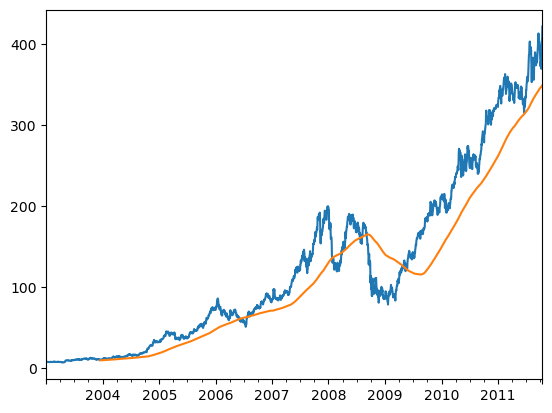

In [37]:
close_px["AAPL"].plot()

# the rolling operator behaves like a resample and groupby based on a number of periods
# by default, the right edge of the window is used as labels
close_px["AAPL"].rolling(250).mean().plot()

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64


<Axes: >

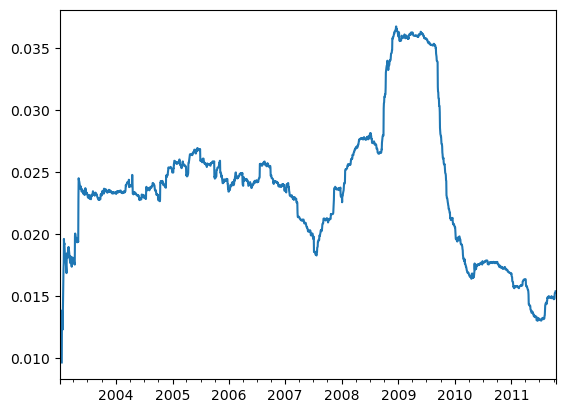

In [42]:
plt.figure()

std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
print(std250[5:12])

std250.plot()

<Axes: >

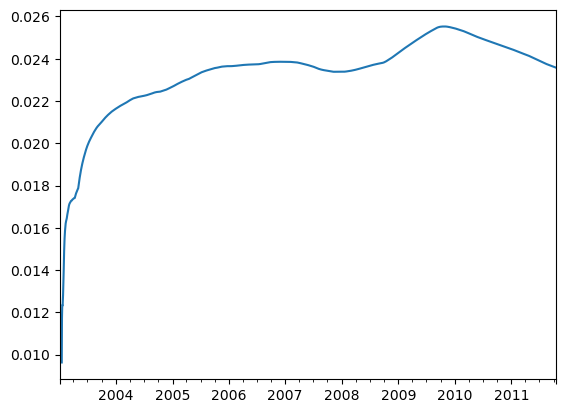

In [44]:
# an expanding mean starts the window from some time and increases the size until it encompasses the whole series
expanding_mean = std250.expanding().mean()
expanding_mean.plot()

<Axes: >

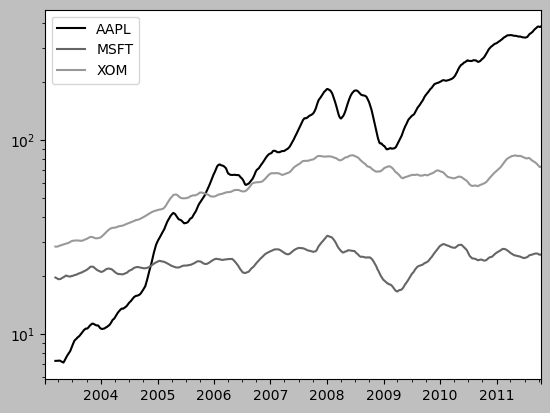

In [45]:
plt.style.use("grayscale")

# on a dataframe, moving window functions are applied on each column
close_px.rolling(50).mean().plot(logy=True)

In [46]:
# the rolling function also accepts a string indicating a fixed-size time offset
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


- `rolling()` can be used to group data by some time window, expressed in a number of periods
- it creates groups similar to `groupby()`, with the distinction that each group contains all values of the given window, partially overlapping with other groups
- `expanding()` can be used similarly, though for in this case the group expands
- `rolling()` can also be called with a string that indicates some fixed-size time offset

## Exponentially Weighted Functions

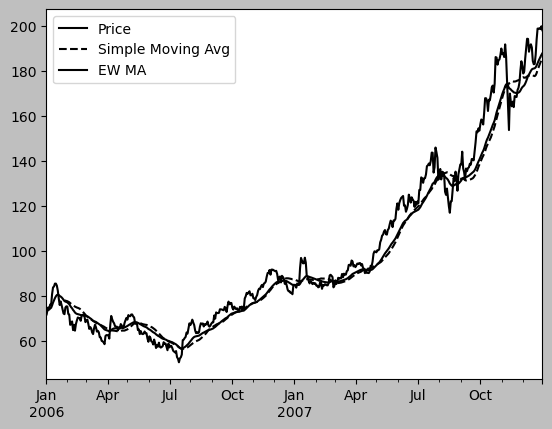

In [47]:
# instead of having a fixed-size window with equal weights
# another option is to use a constant decay factor, giving more weight to more recent observations
aapl_px = close_px["AAPL"]["2006":"2007"]

ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean()

aapl_px.plot(style="k-", label="Price")
ma30.plot(style="k--", label="Simple Moving Avg")
ewma30.plot(style="k-", label="EW MA")

plt.legend()

- instead of a fixed-size window, exponentially weighted functions use a weight decay factor for the edges of a window, partially taking into account all data
- in pands, the `ewm()` method can be used to compute them
- the `span` operator defines a window of values to take into account

## Binary Moving Window Functions

In [48]:
spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<Axes: >

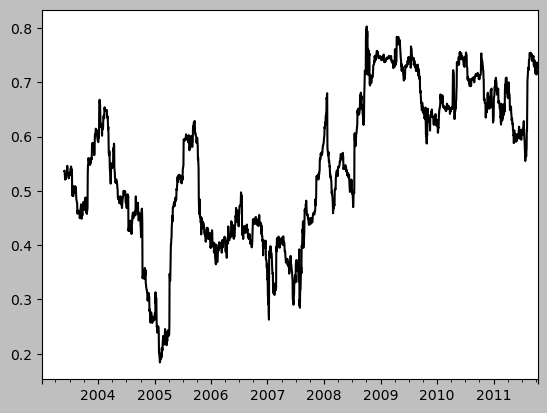

In [49]:
# binary moving window functions are window functions on two time series
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<Axes: >

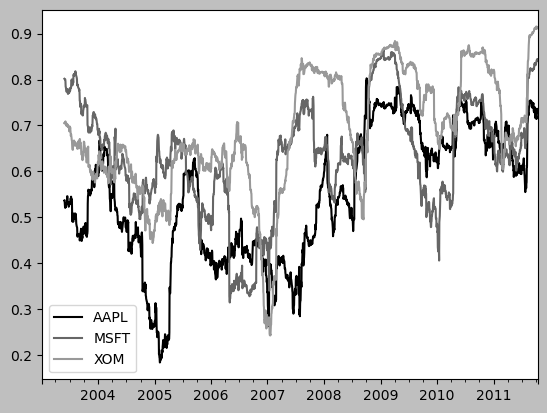

In [50]:
# on a dataframe, this is automatically calculated on each column
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

- binary moving window functions are functions that operate on two time series
- the `corr()` method is one such example, which computes the correlation between two time series
- calling `corr()` with one series being a dataframe, the operation is computed on each column

## User-Defined Moving Window Functions

<Axes: >

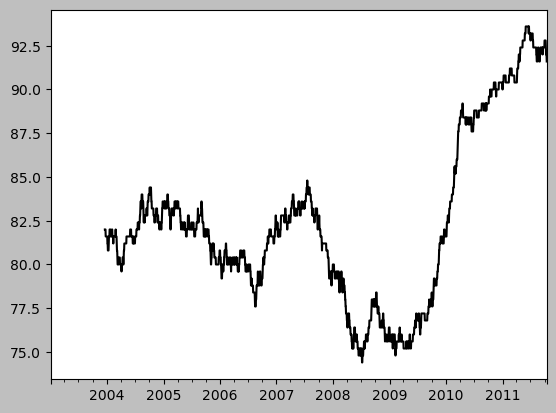

In [53]:
# as with groupby, we can use apply on the rolling window as well
from scipy.stats import percentileofscore

def score_at_2percent(x):
    """Scipy function"""
    return percentileofscore(x, 0.02)

result = returns["AAPL"].rolling(250).apply(score_at_2percent)
result.plot()

- as `rolling()` behaves similar to grouping data, we can also use `apply()` on it to perform some arbitrary calculation